## **Time-Series Forecasting without removing trend and seasonality**

In [ ]:
# !pip install statsmodels
# !pip install pmdarima

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# # load dataset
# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# print(series)
# series.index = series.index.to_period('M')
# print(series.index)
# # split into train and test sets
# X = series.values
# print(X)
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = []
# # walk-forward validation
# for t in range(len(test) + 10):
#   model = ARIMA(history, order=(5,1,0))
#   model_fit = model.fit()
#   output = model_fit.forecast()
#   yhat = output[0]
#   predictions.append(yhat)
#   if (t < len(test)):
#     obs = test[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
#   else:
#     history.append(yhat)
#     print('predicted=%f' % yhat)
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions[:len(test)]))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(test, color='blue')
# pyplot.plot(predictions, color='red')
# pyplot.show()

In [ ]:
# data preprocessing
time = "Year"
feature = "Access to electricity, urban (% of urban population)"
df = read_csv('dfFltrd8May - dfFltrd8May.csv', header=0, usecols=[time, feature, "Country Name"])
df = df[df["Country Name"] == "China"]
df = df.drop(['Country Name'], axis=1)
df.reset_index(drop=True, inplace=True)
df = df.fillna(method="pad")
df.to_csv("output.csv")

Year
2000-01-01    100.000000
2001-01-01     99.754280
2002-01-01     99.752640
2003-01-01     99.756592
2004-01-01     99.773071
2005-01-01     99.808769
2006-01-01     99.864975
2007-01-01     99.930870
2008-01-01     99.975945
2009-01-01     99.996094
2010-01-01    100.000000
2011-01-01    100.000000
2012-01-01    100.000000
2013-01-01    100.000000
2014-01-01    100.000000
2015-01-01    100.000000
2016-01-01    100.000000
2017-01-01    100.000000
2018-01-01    100.000000
2019-01-01    100.000000
2020-01-01    100.000000
Name: Access to electricity, urban (% of urban population), dtype: float64
<class 'pandas.core.series.Series'>
PeriodIndex(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
             '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
             '2016', '2017', '2018', '2019', '2020'],
            dtype='period[A-DEC]', name='Year')
[100.          99.75428009  99.75263977  99.7565918   99.77307129
  99.80876923  99.86497498  99.930870

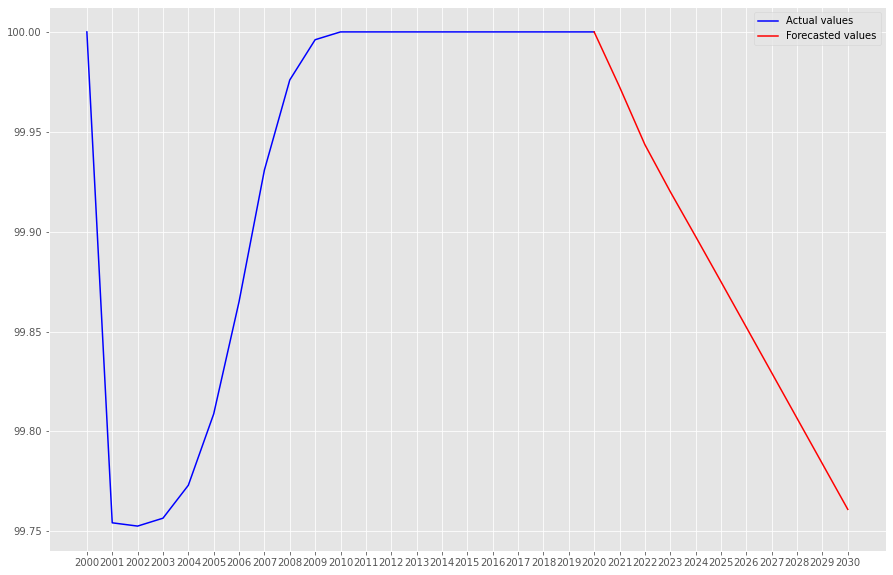

In [ ]:
# load dataset
def parser(x):
	return datetime.strptime(x, '%Y')
series = read_csv('output.csv', header=0, index_col=0, usecols=[time, feature], parse_dates=True, squeeze=True, date_parser=parser)
print(series)
print(type(series))
series.index = series.index.to_period('Y')
print(series.index)
# split into train and test sets
X = series.values
print(X)
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
train = X
history = [x for x in train]
# walk-forward validation
model = ARIMA(history, order=(2,1,2))
model_fit = model.fit()
output = list(model_fit.forecast(10)[0])
output = [train[-1]] + output
# evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions[:len(test)]))
# print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
X_train = [str(x) for x in range(2000, 2021)]
X_test = [str(x) for x in range(2020, 2031)]
plt.figure(figsize=(15, 10))
pyplot.plot(X_train, train, color='blue')
pyplot.plot(X_test, output, color='red')
pyplot.legend(["Actual values", "Forecasted values"], loc='best')
pyplot.show()

## **Data Preprocessing**

In [ ]:
# !pip install statsmodels
# !pip install pmdarima

# data preprocessing
time = "Year"
feature = "Access to electricity, urban (% of urban population)"
df = read_csv('dfFltrd8May - dfFltrd8May.csv', header=0, usecols=[time, feature, "Country Name"])
df = df[df["Country Name"] == "China"]
df = df.drop(['Country Name'], axis=1)
df.reset_index(drop=True, inplace=True)
df = df.fillna(method="pad")
df.to_csv("output.csv")

## **Time series forecasting - SARIMA vs Auto ARIMA models**
Source - https://medium.com/analytics-vidhya/time-series-forecasting-sarima-vs-auto-arima-models-f95e76d71d8f

In [ ]:
# !pip install statsmodels
# !pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
ts = read_csv('output.csv', header=0, index_col=0, usecols=[time, feature], parse_dates=True, squeeze=True, date_parser=parser)
ts.index = ts.index.to_period('Y').to_timestamp()
ts = ts.to_frame()
print(ts)

            Access to electricity, urban (% of urban population)
Year                                                            
2000-01-01                                         100.000000   
2001-01-01                                          99.754280   
2002-01-01                                          99.752640   
2003-01-01                                          99.756592   
2004-01-01                                          99.773071   
2005-01-01                                          99.808769   
2006-01-01                                          99.864975   
2007-01-01                                          99.930870   
2008-01-01                                          99.975945   
2009-01-01                                          99.996094   
2010-01-01                                         100.000000   
2011-01-01                                         100.000000   
2012-01-01                                         100.000000   
2013-01-01               

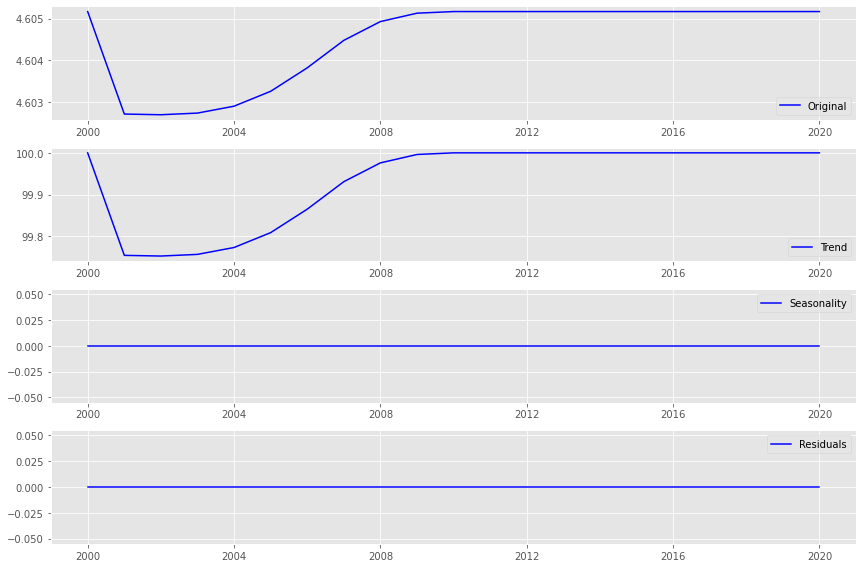

In [ ]:
# Using the decomposition method which allows us to separately view seasonality, trend and 
# random which is the variability in the data set after removing the effects of the seasonality and trend.
decomposition = seasonal_decompose(ts)

# Gathering the trend, seasonality and noise of the decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

The plot shows that the data has trend but not seasonality. That means it is not stationary.

Statistical test: To confirm our visual observation on the above plot, we will use the Dickey-Fuller Hypothesis testing.


**Null Hypothesis**: The series is not stationary.

**Alternate Hypothesis**: The series is stationary.



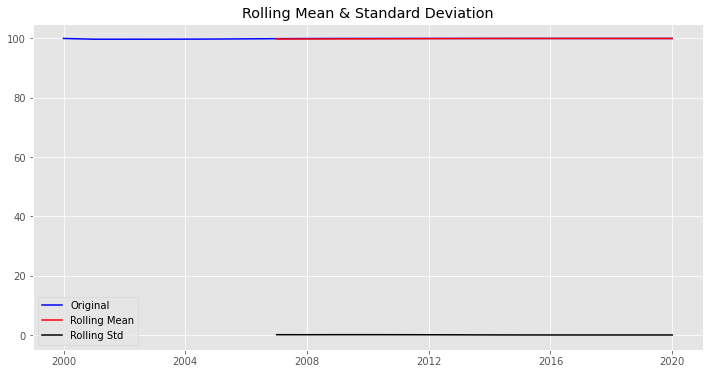

Results of Dickey-Fuller Test:
Test Statistic                -614.996221
p-value                          0.000000
#Lags Used                       8.000000
Number of Observations Used     12.000000
Critical Value (1%)             -4.137829
Critical Value (5%)             -3.154972
Critical Value (10%)            -2.714477
dtype: float64


In [ ]:
# Calculate rolling statistics
rolmean = ts.rolling(window = 8, center = False).mean() 
rolstd = ts.rolling(window = 8, center = False).std()

# Perform the Dickey Fuller Test
dftest = adfuller(ts[feature])

# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
orig = plt.plot(ts, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Print Dickey-Fuller test results
print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for k,v in dftest[4].items():
  dfoutput['Critical Value (%s)'%k] = v
print(dfoutput)

With the p-value 1 which is greater than 0.05, we fail to reject the null hypothesis & it confirms that the series is not stationary.

## **Manually finding p, d and q values**

In [ ]:
# ts_diff = ts.diff(periods=8).dropna()

In [ ]:
# # Calculate rolling statistics
# rolmean = ts_diff.rolling(window = 8, center = False).mean() 
# rolstd = ts_diff.rolling(window = 8, center = False).std()

# # Perform the Dickey Fuller Test
# dftest = adfuller(ts_diff[feature])

# # Plot rolling statistics
# fig = plt.figure(figsize=(12,6))
# orig = plt.plot(ts_diff, color='blue', label='Original')
# mean = plt.plot(rolmean, color='red', label='Rolling Mean')
# std = plt.plot(rolstd, color='black', label='Rolling Std')
# plt.legend(loc='best')
# plt.title('Rolling Mean & Standard Deviation')
# plt.show(block=False)

# # Print Dickey-Fuller test results
# print('Results of Dickey-Fuller Test:')

# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
# for k,v in dftest[4].items():
#   dfoutput['Critical Value (%s)'%k] = v
# print(dfoutput)

After performing a differencing 8 times, the test confirms that the data is stationary. That means the d value is 8.

In [ ]:
# fig, ax = plt.subplots(figsize=(8,3))
# plot_acf(ts, ax=ax, lags=8);

# fig, ax = plt.subplots(figsize=(8,3))
# plot_pacf(ts, ax=ax, lags=8);

PACF & ACF suggested that AR(2) & MA(8), the next step is to run the ARIMA model using the range of values estimated by the ACF & PACF. Information criterion like AIC (Akaike Information Criterion) or BIC(Bayesian Information Criterion) will be used to choose among correctly fitted models.

## **Auto ARIMA model**

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  27.904
Date:                Sat, 14 May 2022   AIC                            -53.808
Time:                        21:30:23   BIC                            -52.812
Sample:                             0   HQIC                           -53.613
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0036      0.000      8.138      0.000       0.003       0.004
Ljung-Box (Q):                         nan   Jarque-Bera (JB):               141.56
Prob(Q):                               nan   Pr

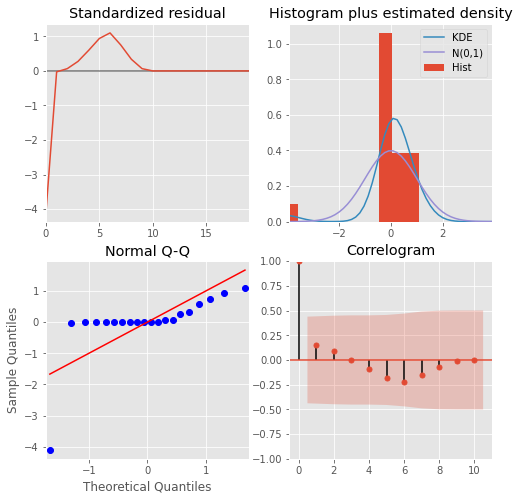

In [ ]:
model = pm.auto_arima(ts, start_p=1, start_q=1)
# , test='adf', max_p=5, max_q=5, d=0, seasonal=True, start_P=0, start_Q=0, 
#                       D=0, trace=True, error_action='ignore', with_intercept=False, stationary=True
print(model.summary())
model.plot_diagnostics(figsize=(8, 8))
plt.show()

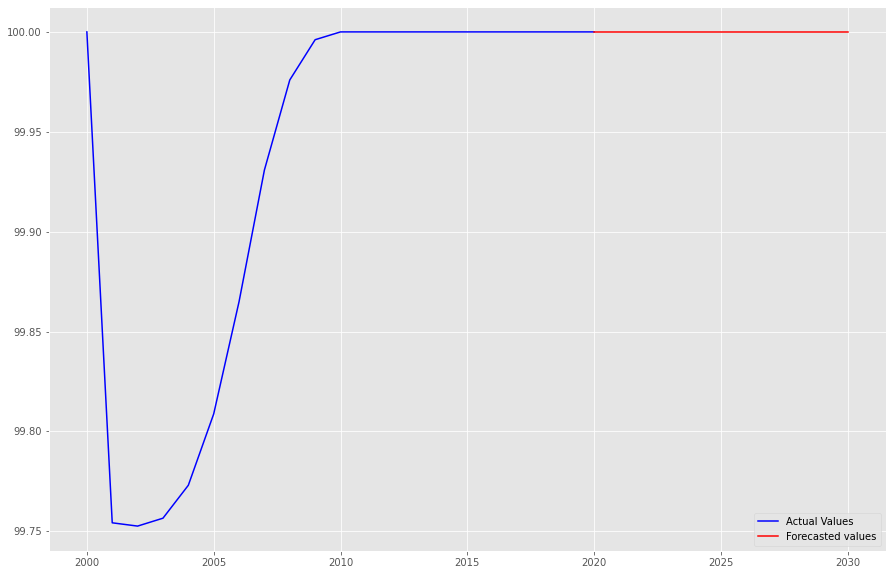

In [ ]:
prediction = model.predict().tolist()
X = [x for x in range(2000, 2021)]
X_test = [x for x in range(2020, 2031)]
Y = ts[feature].values.tolist()
prediction = [Y[-1]] + prediction
plt.figure(figsize=(15, 10))
plt.plot(X, Y, color="blue")
plt.plot(X_test, prediction, color="red")
plt.legend(["Actual Values", "Forecasted values"], loc='best')

In [ ]:
# # Define the p, d and q parameters to take any value between 0 and 5
# p = d = q = range(0, 2)

# # Generate all different combinations of p, d and q triplets
# pdq = list(itertools.product(p, d, q))

# # Generate all different combinations of seasonal p, d and q triplets
# pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#   for combs in pdqs:
#     try:
#       mod = sm.tsa.statespace.SARIMAX(ts, order=comb, seasonal_order=combs, enforce_stationarity=False, enforce_invertibility=False)
#       output = mod.fit()
#       ans.append([comb, combs, output.aic])
#       print('ARIMA {} x {}12 : AIC Calculated = {}'.format(comb, combs, output.aic))
#     except:
#       continue
# ans_df = pd.Dataframe(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [ ]:
# ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts, order=(1, 0, 4), enforce_stationarity=False, enforce_invertibility=False)
# output = ARIMA_MODEL.fit()
# print(output.summary().tables[1])

# # Use plot_diagnostics with results calculated above.
# output.plot_diagnostics(figsize=(15, 18))
# plt.show()

## **Supervised and Deep Learning Models**

In [ ]:
# !pip install statsmodels
# !pip install pmdarima

# data preprocessing
time = "Year"
feature = "CO2 emissions (metric tons per capita)"
df = read_csv('dfFltrd8May - dfFltrd8May.csv', header=0)
df = df[df["Country Name"] == "China"]
df = df.fillna(method="pad")
df.to_csv("output.csv")

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv("output.csv")
df = df.drop("Unnamed: 0",axis=1)

date_time = pd.to_datetime(df.pop('Year'), format='%Y')
df.head()

,Country Name,Country Code,Forest area (% of land area),Urban population (% of total population),Urban population growth (annual %),"Access to electricity, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Individuals using the Internet (% of population),Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: energy depletion (% of GNI),Adjusted savings: mineral depletion (% of GNI),Merchandise trade (% of GDP),Adjusted savings: natural resources depletion (% of GNI),Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Trade (% of GDP),Forest rents (% of GDP),Mineral rents (% of GDP),GDP (current US$),"GDP per capita, PPP (current international $)",GNI (current US$),"Compulsory education, duration (years)","Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among adolescents ages 10-14 years (per 1,000)","Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)",Number of infant deaths,"International tourism, number of arrivals","Net bilateral aid flows from DAC donors, United States (current US$)","Net bilateral aid flows from DAC donors, Japan (current US$)","Net bilateral aid flows from DAC donors, Germany (current US$)","Net bilateral aid flows from DAC donors, United Kingdom (current US$)","Net bilateral aid flows from DAC donors, Norway (current US$)","Net bilateral aid flows from DAC donors, Total (current US$)",Current health expenditure (% of GDP),Prevalence of undernourishment (% of population),"International tourism, expenditures (% of total imports)","Communications, computer, etc. (% of service imports, BoP)","Foreign direct investment, net outflows (BoP, current US$)",CO2 emissions (metric tons per capita),Cost of business start-up procedures (% of GNI per capita),Military expenditure (% of GDP),Import value index (2000 = 100),Market capitalization of listed domestic companies (% of GDP),"Listed domestic companies, total",Energy intensity level of primary energy (MJ/$2011 PPP GDP),"PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)",Research and development expenditure (% of GDP),Researchers in R&D (per million people),"Automated teller machines (ATMs) (per 100,000 adults)","Hospital beds (per 1,000 people)","Physicians (per 1,000 people)",High-technology exports (current US$),"New business density (new registrations per 1,000 people ages 15-64)",Exports as a capacity to import (constant LCU),"International tourism, number of departures"
0,China,CHN,18.780497,35.877,3.649253,100.000000,29.603001,1.775913,5.283053,1.738534,0.058320,39.154516,1.796854,20.893445,18.517094,39.410539,0.222728,0.143065,1.211347e+12,2920.560791,1.196681e+12,9.0,2.4,1.8,3.2,3.3,526220.0,83444000.0,1.570000e+06,769190002.4,212809997.6,83440002.44,9.900000e+06,1.298240e+09,4.508279,NaN,8.791565,28.095805,4.612000e+09,2.648480,NaN,1.830344,100.000000,NaN,1086.0,10.233051,99.999996,0.89316,538.57781,NaN,1.68,1.2356,NaN,NaN,NaN,10473000.0
1,China,CHN,19.031007,37.093,4.059566,99.754280,28.334999,2.639650,5.124909,1.514412,0.043123,38.050816,1.557535,20.312146,18.215214,38.527359,0.210789,0.124862,1.339396e+12,3210.009396,1.320223e+12,9.0,2.3,1.8,3.1,3.2,482938.0,89013000.0,4.840000e+06,686130004.9,163820007.3,50720001.22,9.650000e+06,1.119580e+09,4.253299,10.1,8.306369,28.980916,9.696000e+09,2.772929,NaN,1.976186,108.234233,NaN,1154.0,9.833583,99.999996,0.94033,571.71041,NaN,1.66,1.2535,NaN,NaN,NaN,12133000.0
2,China,CHN,19.281517,38.425,4.198001,99.752640,26.978399,4.595704,5.330136,1.167781,0.061679,42.213185,1.229461,22.644746,20.102658,42.747404,0.206403,0.127807,1.470550e+12,3534.849130,1.455605e+12,9.0,2.1,1.7,2.9,3.2,440707.0,97908000.0,1.699000e+07,828710022.0,149869995.1,36130001.07,1.219000e+07,1.269150e+09,4.382852,9.5,7.971238,30.830658,6.284050e+09,2.974328,NaN,2.049686,131.172675,NaN,1223.0,

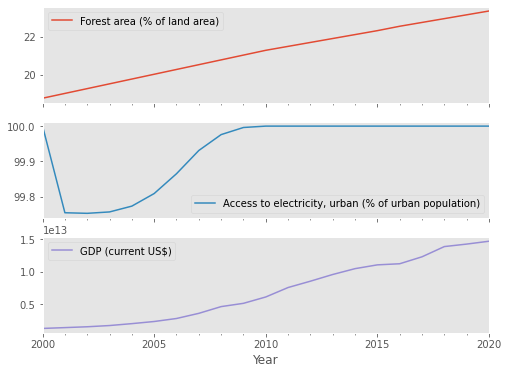

In [ ]:
plot_cols = ['Forest area (% of land area)', 'Access to electricity, urban (% of urban population)', 'GDP (current US$)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Forest area (% of land area),21.0,2.117060e+01,1.419814e+00,1.878050e+01,2.003305e+01,2.128560e+01,2.231309e+01,2.334060e+01
Urban population (% of total population),21.0,4.896100e+01,8.012974e+00,3.587700e+01,4.252200e+01,4.922600e+01,5.550000e+01,6.142800e+01
Urban population growth (annual %),21.0,3.263342e+00,6.042749e-01,2.066047e+00,2.842871e+00,3.255365e+00,3.674728e+00,4.198001e+00
"Access to electricity, urban (% of urban population)",21.0,9.993396e+01,1.002264e-01,9.975264e+01,9.986497e+01,1.000000e+02,1.000000e+02,1.000000e+02
Renewable energy consumption (% of total final energy consumption),21.0,1.623750e+01,5.917973e+00,1.133820e+01,1.226130e+01,1.312380e+01,1.744080e+01,2.960300e+01
...,...,...,...,...,...,...,...,...
"Physicians (per 1,000 people)",21.0,1.509324e+00,3.102414e-01,1.113400e+00,1.247000e+00,1.433400e+00,1.773200e+00,1.979800e+00
High-technology exports (current US$),14.0,5.797940e+11,1.383946e+11,3.425740e+11,4.908023e+11,6.233666e+11,6.554622e+11,7.576827e+11
"New business density (new registrations per 1,000 people ages 15-64)",11.0,6.652950e+00,2.277070e+00,3.579166e+00,4.063802e+00,7.706354e+00,8.580879e+00,9.081590e+00
Exports as a capacity to import (constant LCU),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **ARIMAX model**

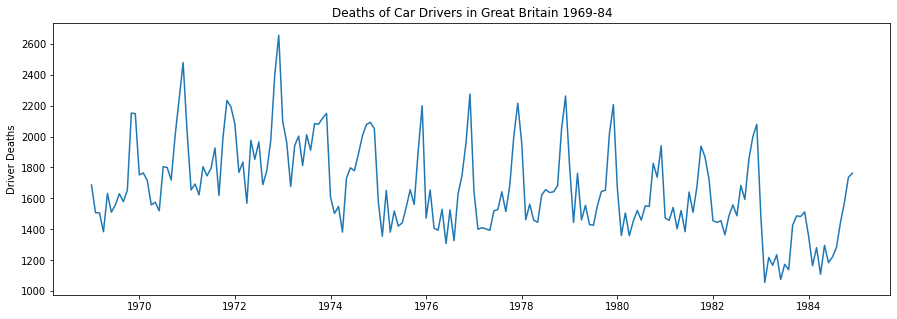

In [ ]:
# !pip install git+https://github.com/RJT1990/pyflux

import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt

data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/drivers.csv")
data.index = data['time'];
data.loc[(data['time']>=1983.05), 'seat_belt'] = 1;
data.loc[(data['time']<1983.05), 'seat_belt'] = 0;
data.loc[(data['time']>=1974.00), 'oil_crisis'] = 1;
data.loc[(data['time']<1974.00), 'oil_crisis'] = 0;
plt.figure(figsize=(15,5));
plt.plot(data.index,data['value']);
plt.ylabel('Driver Deaths');
plt.title('Deaths of Car Drivers in Great Britain 1969-84');
plt.plot();

In [ ]:
model = pf.ARIMAX(data=data, formula='value~1+seat_belt+oil_crisis',
                  ar=1, ma=1, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: value                               Method: MLE                                       
Start Date: 1969.08333333333                            Log Likelihood: -1297.4978                        
End Date: 1984.91666666667                              AIC: 2606.9955                                    
Number of observations: 191                             BIC: 2626.5092                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.9171     0.076      12.0707  0.0      (0.7681 | 1.066)         
MA(1)                                

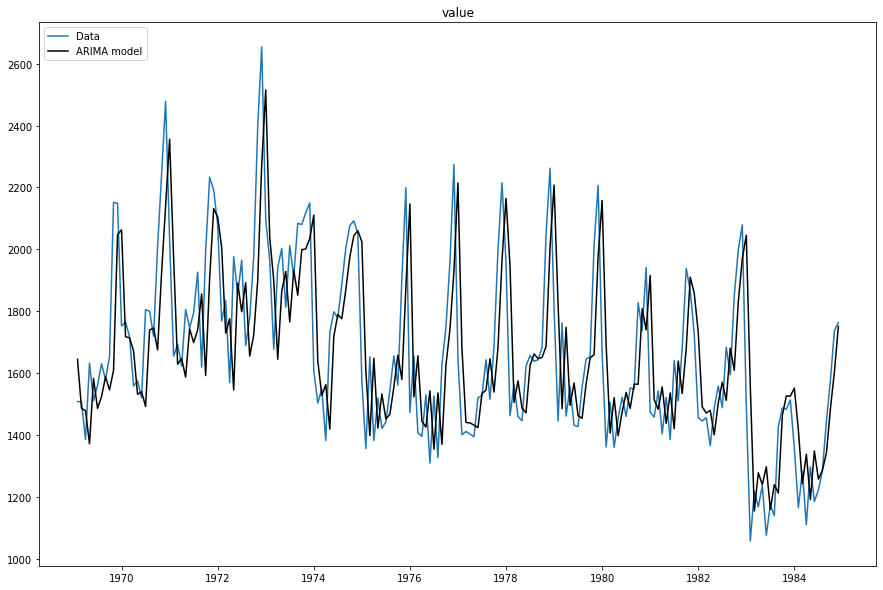

In [ ]:
model.plot_fit(figsize=(15,10))

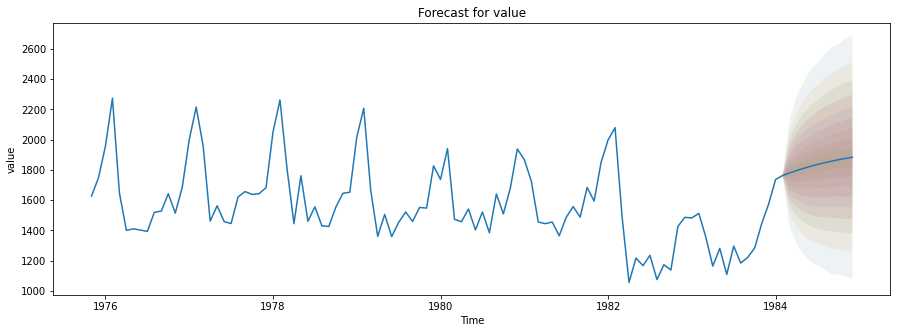

In [ ]:
model.plot_predict(h=10, oos_data=data.iloc[-12:], past_values=100, figsize=(15,5))

In [ ]:
model.predict(oos_data=data.iloc[-12:])

,value
time,
1984.583333,1779.805026
1984.666667,1795.736252
1984.750000,1810.346020
1984.833333,1823.743944
1984.916667,1836.030542


## **Final Code Submission 1**

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  27.904
Date:                Sat, 14 May 2022   AIC                            -53.808
Time:                        21:32:18   BIC                            -52.812
Sample:                             0   HQIC                           -53.613
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0036      0.000      8.138      0.000       0.003       0.004
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):               141.56
Prob(Q):                              0.47   Pr

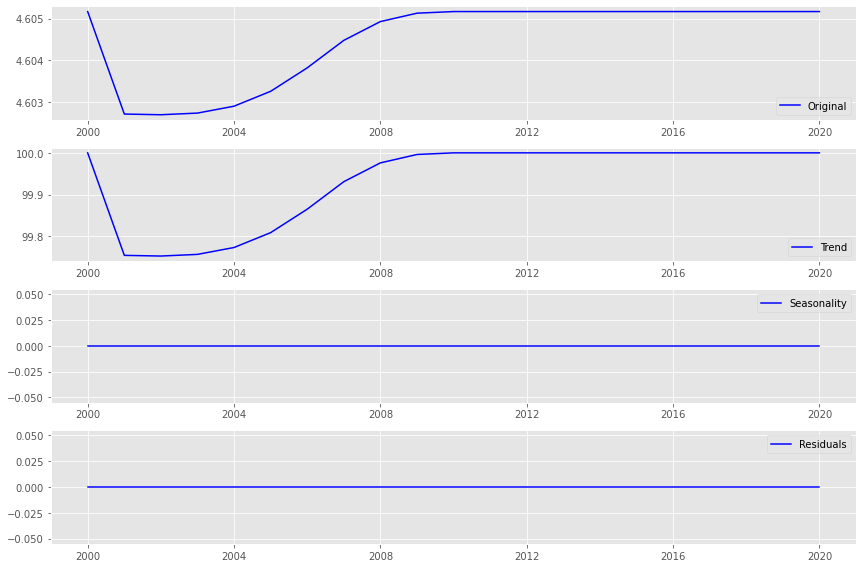

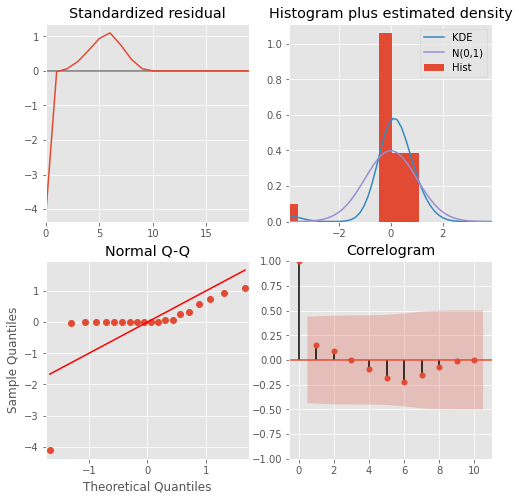

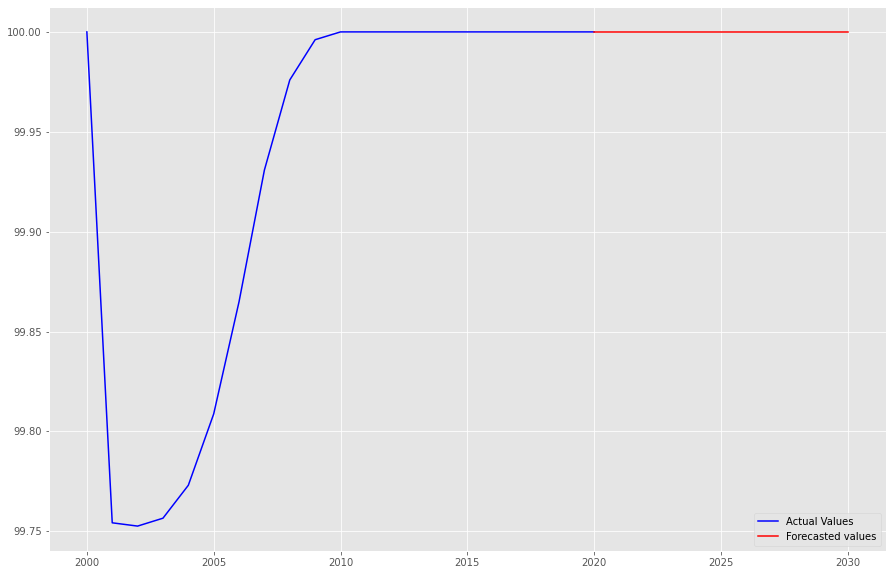

In [ ]:
# !pip install statsmodels
# !pip install pmdarima

# Importing necessary libraries
import seaborn as sns
import warnings
import itertools
import statsmodels.api as sm
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Function to parse the time data
def parser(x):
	return datetime.strptime(x, '%Y')

# Data preprocessing
time = "Year"
feature = "Access to electricity, urban (% of urban population)"
df = pd.read_csv('dfFltrd8May - dfFltrd8May.csv', header=0, usecols=[time, feature, "Country Name"])
df = df[df["Country Name"] == "China"]
df = df.drop(['Country Name'], axis=1)
df.reset_index(drop=True, inplace=True)
df = df.fillna(method="pad")
df.to_csv("output.csv")

# Reading the input data
ts = pd.read_csv('output.csv', header=0, index_col=0, usecols=[time, feature], parse_dates=True, squeeze=True, date_parser=parser)
ts.index = ts.index.to_period('Y').to_timestamp()
ts = ts.to_frame()

# Using the decomposition method which allows us to separately view seasonality, trend and 
# random which is the variability in the data set after removing the effects of the seasonality and trend.
decomposition = seasonal_decompose(ts)

# Gathering the trend, seasonality and noise of the decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

# Auto ARIMA model 
model = pm.auto_arima(ts, start_p=1, start_q=1)
print(model.summary())
model.plot_diagnostics(figsize=(8, 8))
plt.show()

# Time series forecasting 
prediction = model.predict().tolist()
X = [x for x in range(2000, 2021)]
X_test = [x for x in range(2020, 2031)]
Y = ts[feature].values.tolist()
prediction = [Y[-1]] + prediction
plt.figure(figsize=(15, 10))
plt.plot(X, Y, color="blue")
plt.plot(X_test, prediction, color="red")
plt.legend(["Actual Values", "Forecasted values"], loc='best')

## **Final Code Submission 2**

In [ ]:
# !pip install git+https://github.com/RJT1990/pyflux

import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt

# Data Preprocessing
countries = ["United States", "India", "China", "Australia", "Brazil", "Portugal"]
n = len(countries)
for i in range(n):
  df = pd.read_csv('dfCountryImputed2.csv')
  df = df[df["Country Name"] == countries[i]]
  df.to_csv("output{}.csv".format(i))

## ---------------------------------Forecasting for Urban population (% of total population)---------------------------------
dependent_feature = "Urban_population_percent_of_total_population"
independent_features = ["Urban_population_growth_annual_percent", "Forest_area_percent_of_land_area"]

data = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'brown', 'maroon', 'lime', 'darkviolet']
for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = {' "Urban population (% of total population)"':dependent_feature, ' "Urban population growth (annual %)"':independent_features[0], ' "Forest area (% of land area)"':independent_features[1]}, inplace = True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula='{0}~{1}+{2}'.format(dependent_feature, independent_features[0], \
                                                            independent_features[1]), ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  print("-------------------------------------------------------------------------")
  print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  print("-------------------------------------------------------------------------")
  print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  print(prediction)  
  print("-------------------------------------------------------------------------")
  print()
  print()
  print()
  print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel('Urban population (% of total population)');
plt.title('Forecast for Urban population (% of total population)');
plt.legend(countries, loc='best')


## ------------------------------Cost_of_business_startup_procedures_percent_of_GNI_per_capita------------------------------
dependent_feature = "Cost_of_business_startup_procedures_percent_of_GNI_per_capita"
independent_features = ["Trade_percent_of_GDP", "Forest_rents_percent_of_GDP", "GDP_current_USD"]

data = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'brown', 'maroon', 'lime', 'darkviolet']
for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = {' "Cost of business start-up procedures (% of GNI per capita)"':dependent_feature, \
                       ' "Merchandise trade (% of GDP)"':independent_features[0], ' "Forest rents (% of GDP)"':independent_features[1], \
                       ' "GDP (current US$)"':independent_features[2]}, inplace = True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula='{0}~{1}+{2}'.format(dependent_feature, independent_features[0], \
                                                            independent_features[1]), ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  print("-------------------------------------------------------------------------")
  print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  print("-------------------------------------------------------------------------")
  print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  print(prediction)  
  print("-------------------------------------------------------------------------")
  print()
  print()
  print()
  print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel('Cost of business start-up procedures (% of GNI per capita)');
plt.title('Forecast for Cost of business start-up procedures (% of GNI per capita)');
plt.legend(countries, loc='best')

## **Final presentation results**

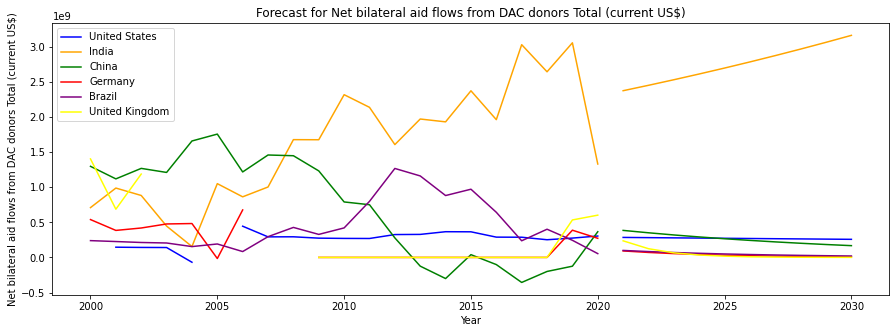

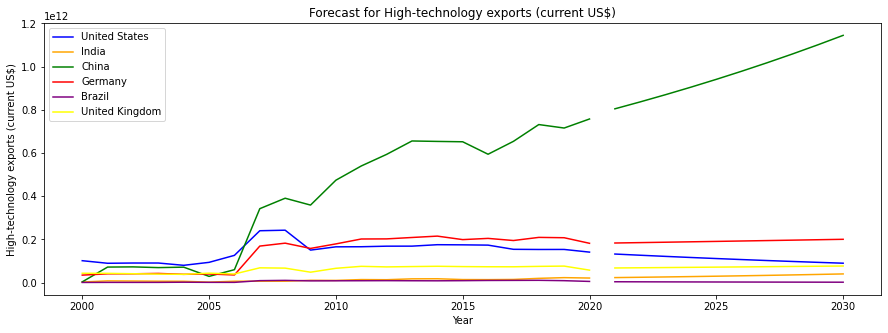

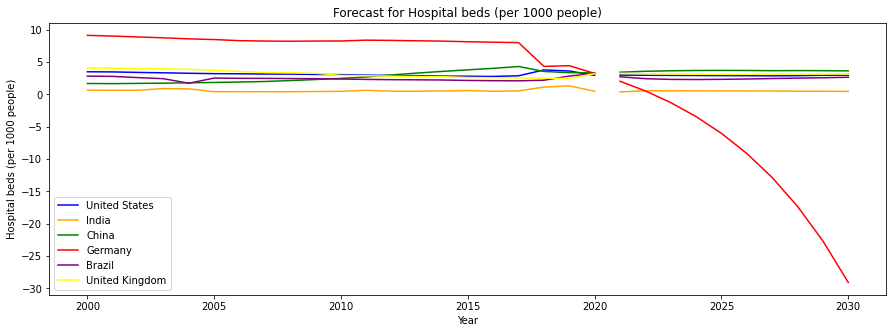

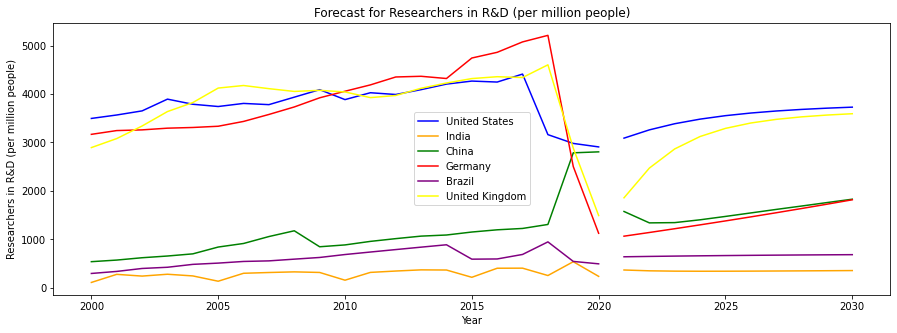

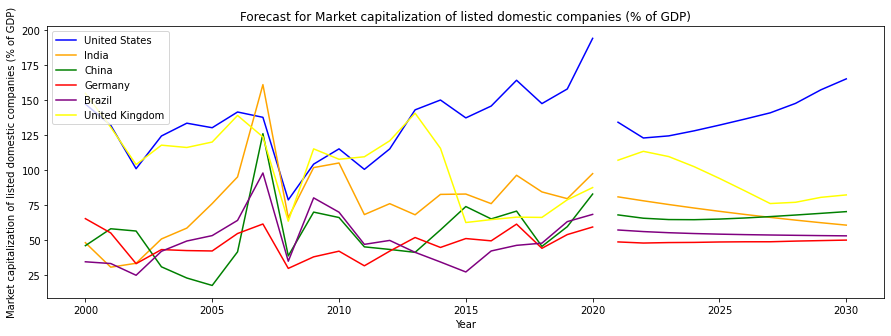

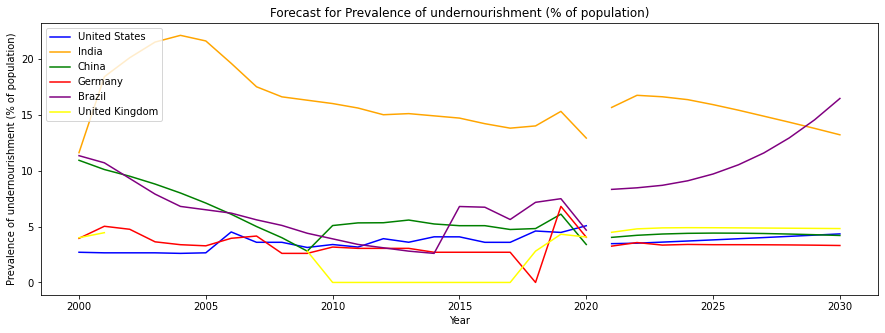

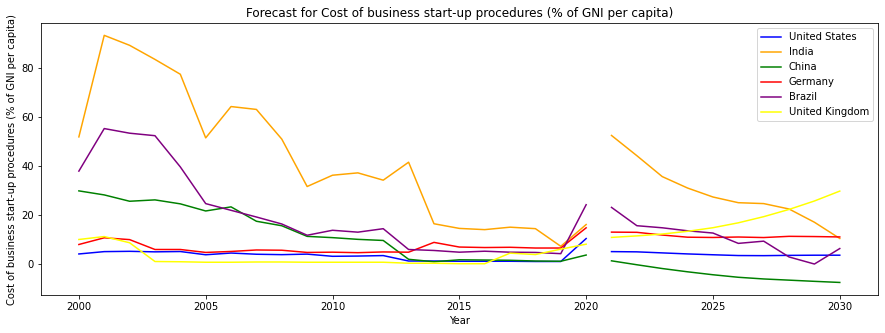

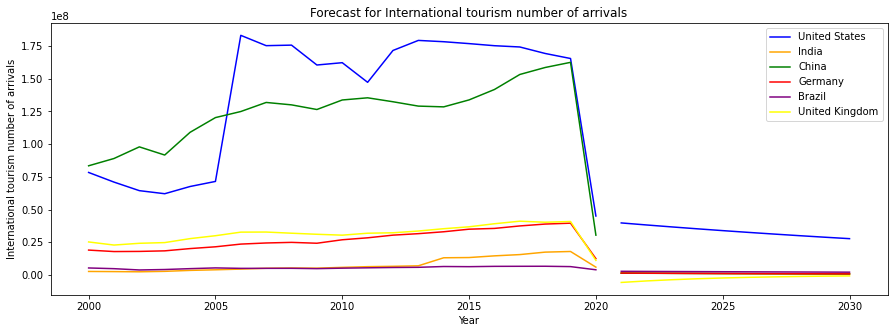

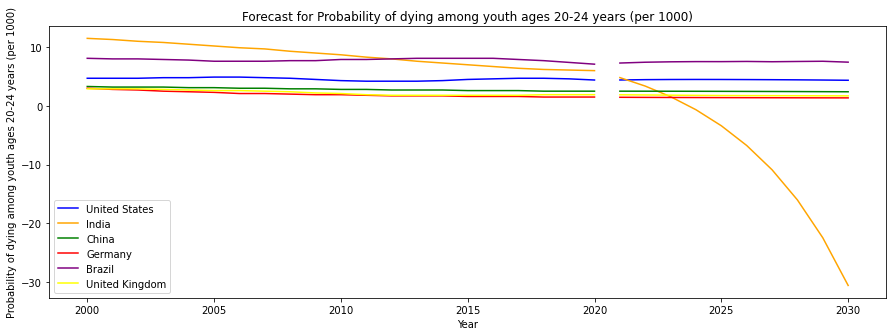

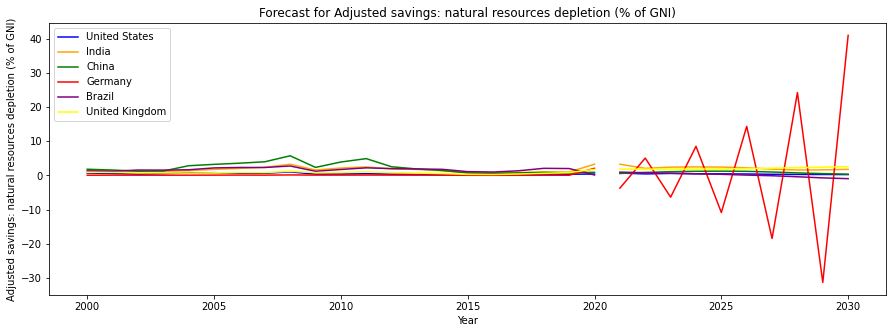

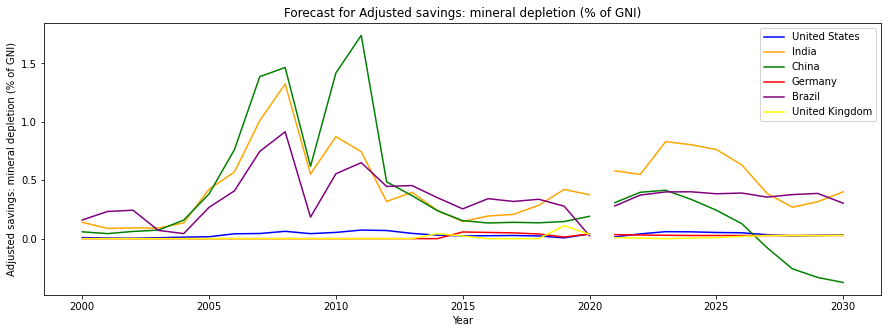

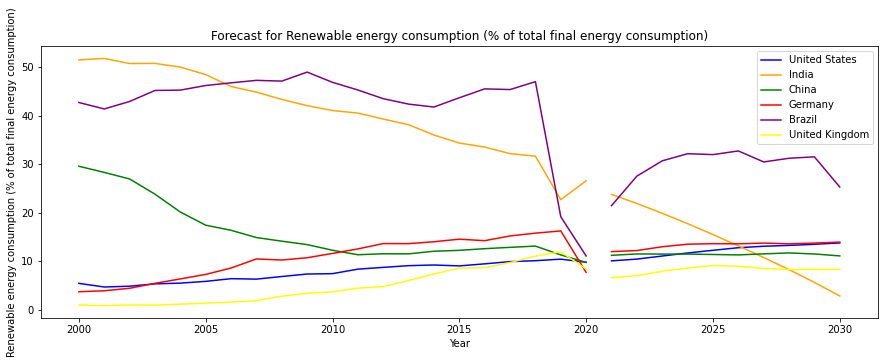

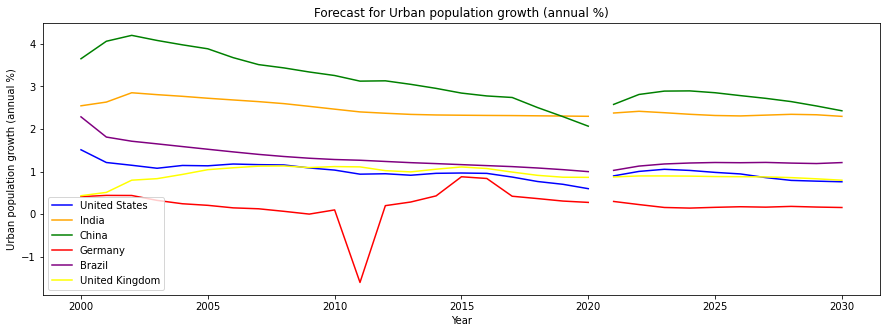

In [35]:
# !pip install git+https://github.com/RJT1990/pyflux

import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt

# Data Preprocessing
countries = ["United States", "India", "China", "Germany", "Brazil", "United Kingdom"]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'brown', 'maroon', 'lime', 'darkviolet']
n = len(countries)
for i in range(n):
  df = pd.read_csv('dfCountryImputed2.csv')
  df = df[df["Country Name"] == countries[i]]
  df.to_csv("output{}.csv".format(i))

## ---------------------------------Forecasting for Net bilateral aid flows from DAC donors Total (current US$)---------------------------------
dependent_feature = "Net_bilateral_aid_flows_from_DAC_donors_Total_current_USD"
independent_features = ["Urban_population_percent_of_total_population", "Forest_area_percent_of_land_area"]

data = []
for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = {' "Net bilateral aid flows from DAC donors Total (current US$)"':dependent_feature, ' "Urban population (% of total population)"':independent_features[0], ' "Forest area (% of land area)"':independent_features[1]}, inplace = True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula='{0}~{1}+{2}'.format(dependent_feature, independent_features[0], \
                                                            independent_features[1]), ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel('Net bilateral aid flows from DAC donors Total (current US$)');
plt.title('Forecast for Net bilateral aid flows from DAC donors Total (current US$)');
plt.legend(countries, loc='best')


## ------------------------------Forecasting for High-technology exports (current US$)------------------------------
dependent_feature = "Hightechnology_exports_current_USD"
independent_features = ["Urban_population_growth_annual_percent", "Forest_area_percent_of_land_area"]

data = []
for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = {' "High-technology exports (current US$)"':dependent_feature, ' "Urban population growth (annual %)"':independent_features[0], \
                       ' "Forest area (% of land area)"':independent_features[1]}, inplace = True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula='{0}~{1}+{2}'.format(dependent_feature, independent_features[0], \
                                                            independent_features[1]), ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel('High-technology exports (current US$)');
plt.title('Forecast for High-technology exports (current US$)');
plt.legend(countries, loc='best')

## ------------------------------Forecasting for Hospital beds (per 1000 people)------------------------------
dependent_feature = "Hospital_beds_per_1000_people"
independent_features = ["Urban_population_percent_of_total_population", "Forest_area_percent_of_land_area"]

data = []
for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = {' "Hospital beds (per 1000 people)"':dependent_feature, ' "Urban population (% of total population)"':independent_features[0], \
                       ' "Forest area (% of land area)"':independent_features[1]}, inplace = True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula='{0}~{1}+{2}'.format(dependent_feature, independent_features[0], \
                                                            independent_features[1]), ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel('Hospital beds (per 1000 people)');
plt.title('Forecast for Hospital beds (per 1000 people)');
plt.legend(countries, loc='best')

## ---------------------------------Forecasting for Researchers in R&D (per million people)---------------------------------
dependent_feature = "Researchers_in_RD_per_million_people"
independent_features = ["Urban_population_percent_of_total_population", "Forest_area_percent_of_land_area"]

data = []
for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = {' "Researchers in R&D (per million people)"':dependent_feature, ' "Urban population (% of total population)"':independent_features[0], ' "Forest area (% of land area)"':independent_features[1]}, inplace = True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula='{0}~{1}+{2}'.format(dependent_feature, independent_features[0], \
                                                            independent_features[1]), ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel('Researchers in R&D (per million people)');
plt.title('Forecast for Researchers in R&D (per million people)');
plt.legend(countries, loc='best')

## ---------------------------------Forecasting for Market capitalization of listed domestic companies (% of GDP)---------------------------------
dependent_feature = "Market_capitalization_of_listed_domestic_companies_percent_of_GDP"
independent_features = ["Urban_population_percent_of_total_population", "Forest_area_percent_of_land_area"]

data = []
for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = {' "Market capitalization of listed domestic companies (% of GDP)"':dependent_feature, ' "Urban population (% of total population)"':independent_features[0], ' "Forest area (% of land area)"':independent_features[1]}, inplace = True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula='{0}~{1}+{2}'.format(dependent_feature, independent_features[0], \
                                                            independent_features[1]), ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel('Market capitalization of listed domestic companies (% of GDP)');
plt.title('Forecast for Market capitalization of listed domestic companies (% of GDP)');
plt.legend(countries, loc='best')

## ---------------------------------Forecasting for Prevalence of undernourishment (% of population)---------------------------------
dependent_feature = "Prevalence_of_undernourishment_percent_of_population"
independent_features = ["Urban_population_percent_of_total_population", "Access_to_electricity_urban_percent_of_urban_population"]

data = []
for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = {' "Prevalence of undernourishment (% of population)"':dependent_feature, ' "Urban population (% of total population)"':independent_features[0], ' "Access to electricity urban (% of urban population)"':independent_features[1]}, inplace = True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula='{0}~{1}+{2}'.format(dependent_feature, independent_features[0], \
                                                            independent_features[1]), ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel('Prevalence of undernourishment (% of population)');
plt.title('Forecast for Prevalence of undernourishment (% of population)');
plt.legend(countries, loc='best')

## ---------------------------------Forecasting for Cost of business start-up procedures (% of GNI per capita)---------------------------------
dependent_feature = "Cost_of_business_startup_procedures_percent_of_GNI_per_capita"
updated_dependent_feature = "Cost of business start-up procedures (% of GNI per capita)"
independent_features = ["Urban_population_percent_of_total_population", "Merchandise_trade_percent_of_GDP", "Adjusted_savings_mineral_depletion_percent_of_GNI", "Urban_population_growth_annual_percent", \
                        "Mineral_rents_percent_of_GDP", "Individuals_using_the_Internet_percent_of_population", "Adjusted_savings_natural_resources_depletion_percent_of_GNI", \
                        "Renewable_energy_consumption_percent_of_total_final_energy_consumption", "Imports_of_goods_and_services_percent_of_GDP", "Access_to_electricity_urban_percent_of_urban_population", \
                        "Adjusted_savings_energy_depletion_percent_of_GNI", "Trade_percent_of_GDP", "GDP_current_USD", "Forest_area_percent_of_land_area", \
                        "Adjusted_savings_carbon_dioxide_damage_percent_of_GNI", "Forest_rents_percent_of_GDP", "Exports_of_goods_and_services_percent_of_GDP"]
updated_independent_features = ["Urban population (% of total population)", "Merchandise trade (% of GDP)", "Adjusted savings: mineral depletion (% of GNI)", "Urban population growth (annual %)", \
                                "Mineral rents (% of GDP)", "Individuals using the Internet (% of population)", "Adjusted savings: natural resources depletion (% of GNI)", \
                                "Renewable energy consumption (% of total final energy consumption)", "Imports of goods and services (% of GDP)", "Access to electricity urban (% of urban population)", \
                                "Adjusted savings: energy depletion (% of GNI)", "Trade (% of GDP)", "GDP (current US$)", "Forest area (% of land area)", \
                                "Adjusted savings: carbon dioxide damage (% of GNI)", "Forest rents (% of GDP)", "Exports of goods and services (% of GDP)"]
l = len(independent_features)
l = 2

data = []
new_columns = {}
new_columns[' "{}"'.format(updated_dependent_feature)] = dependent_feature
for idx in range(l):
  new_columns[' "{}"'.format(updated_independent_features[idx])] = independent_features[idx]

for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = new_columns, inplace=True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

ARIMAX_formula = "{}~".format(dependent_feature)
for idx in range(l):
  ARIMAX_formula += independent_features[idx]
  if idx != l - 1:
    ARIMAX_formula += '+' 
models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula=ARIMAX_formula, ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel(updated_dependent_feature);
plt.title('Forecast for {}'.format(updated_dependent_feature));
plt.legend(countries, loc='best')

## ---------------------------------Forecasting for International tourism number of arrivals---------------------------------
dependent_feature = "International_tourism_number_of_arrivals"
updated_dependent_feature = "International tourism number of arrivals"
independent_features = ["Urban_population_percent_of_total_population", "Merchandise_trade_percent_of_GDP", "Adjusted_savings_mineral_depletion_percent_of_GNI", "Urban_population_growth_annual_percent", \
                        "Mineral_rents_percent_of_GDP", "Individuals_using_the_Internet_percent_of_population", "Adjusted_savings_natural_resources_depletion_percent_of_GNI", \
                        "Renewable_energy_consumption_percent_of_total_final_energy_consumption", "Imports_of_goods_and_services_percent_of_GDP", "Access_to_electricity_urban_percent_of_urban_population", \
                        "Adjusted_savings_energy_depletion_percent_of_GNI", "Trade_percent_of_GDP", "GDP_current_USD", "Forest_area_percent_of_land_area", \
                        "Adjusted_savings_carbon_dioxide_damage_percent_of_GNI", "Forest_rents_percent_of_GDP", "Exports_of_goods_and_services_percent_of_GDP"]
updated_independent_features = ["Urban population (% of total population)", "Merchandise trade (% of GDP)", "Adjusted savings: mineral depletion (% of GNI)", "Urban population growth (annual %)", \
                                "Mineral rents (% of GDP)", "Individuals using the Internet (% of population)", "Adjusted savings: natural resources depletion (% of GNI)", \
                                "Renewable energy consumption (% of total final energy consumption)", "Imports of goods and services (% of GDP)", "Access to electricity urban (% of urban population)", \
                                "Adjusted savings: energy depletion (% of GNI)", "Trade (% of GDP)", "GDP (current US$)", "Forest area (% of land area)", \
                                "Adjusted savings: carbon dioxide damage (% of GNI)", "Forest rents (% of GDP)", "Exports of goods and services (% of GDP)"]
l = len(independent_features)
l = 2

data = []
new_columns = {}
new_columns[' "{}"'.format(updated_dependent_feature)] = dependent_feature
for idx in range(l):
  new_columns[' "{}"'.format(updated_independent_features[idx])] = independent_features[idx]

for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = new_columns, inplace=True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

ARIMAX_formula = "{}~".format(dependent_feature)
for idx in range(l):
  ARIMAX_formula += independent_features[idx]
  if idx != l - 1:
    ARIMAX_formula += '+' 
models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula=ARIMAX_formula, ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel(updated_dependent_feature);
plt.title('Forecast for {}'.format(updated_dependent_feature));
plt.legend(countries, loc='best')

## ---------------------------------Forecasting for Probability of dying among youth ages 20-24 years (per 1000)---------------------------------
dependent_feature = "Probability_of_dying_among_youth_ages_2024_years_per_1000"
updated_dependent_feature = "Probability of dying among youth ages 20-24 years (per 1000)"
independent_features = ["Urban_population_percent_of_total_population", "Merchandise_trade_percent_of_GDP", "Adjusted_savings_mineral_depletion_percent_of_GNI", "Urban_population_growth_annual_percent", \
                        "Mineral_rents_percent_of_GDP", "Individuals_using_the_Internet_percent_of_population", "Adjusted_savings_natural_resources_depletion_percent_of_GNI", \
                        "Renewable_energy_consumption_percent_of_total_final_energy_consumption", "Imports_of_goods_and_services_percent_of_GDP", "Access_to_electricity_urban_percent_of_urban_population", \
                        "Adjusted_savings_energy_depletion_percent_of_GNI", "Trade_percent_of_GDP", "GDP_current_USD", "Forest_area_percent_of_land_area", \
                        "Adjusted_savings_carbon_dioxide_damage_percent_of_GNI", "Forest_rents_percent_of_GDP", "Exports_of_goods_and_services_percent_of_GDP"]
updated_independent_features = ["Urban population (% of total population)", "Merchandise trade (% of GDP)", "Adjusted savings: mineral depletion (% of GNI)", "Urban population growth (annual %)", \
                                "Mineral rents (% of GDP)", "Individuals using the Internet (% of population)", "Adjusted savings: natural resources depletion (% of GNI)", \
                                "Renewable energy consumption (% of total final energy consumption)", "Imports of goods and services (% of GDP)", "Access to electricity urban (% of urban population)", \
                                "Adjusted savings: energy depletion (% of GNI)", "Trade (% of GDP)", "GDP (current US$)", "Forest area (% of land area)", \
                                "Adjusted savings: carbon dioxide damage (% of GNI)", "Forest rents (% of GDP)", "Exports of goods and services (% of GDP)"]
l = len(independent_features)
l = 2

data = []
new_columns = {}
new_columns[' "{}"'.format(updated_dependent_feature)] = dependent_feature
for idx in range(l):
  new_columns[' "{}"'.format(updated_independent_features[idx])] = independent_features[idx]

for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = new_columns, inplace=True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

ARIMAX_formula = "{}~".format(dependent_feature)
for idx in range(l):
  ARIMAX_formula += independent_features[idx]
  if idx != l - 1:
    ARIMAX_formula += '+' 
models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula=ARIMAX_formula, ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel(updated_dependent_feature);
plt.title('Forecast for {}'.format(updated_dependent_feature));
plt.legend(countries, loc='best')

## ---------------------------------Forecasting for Adjusted savings: natural resources depletion (% of GNI)---------------------------------
dependent_feature = "Adjusted_savings_natural_resources_depletion_percent_of_GNI"
updated_dependent_feature = "Adjusted savings: natural resources depletion (% of GNI)"
independent_features = ["Urban_population_percent_of_total_population", "Merchandise_trade_percent_of_GDP", "Adjusted_savings_mineral_depletion_percent_of_GNI", "Urban_population_growth_annual_percent", \
                        "Mineral_rents_percent_of_GDP", "Individuals_using_the_Internet_percent_of_population", "Renewable_energy_consumption_percent_of_total_final_energy_consumption", \
                        "Imports_of_goods_and_services_percent_of_GDP", "Access_to_electricity_urban_percent_of_urban_population", "Adjusted_savings_energy_depletion_percent_of_GNI", "Trade_percent_of_GDP", \
                        "GDP_current_USD", "Forest_area_percent_of_land_area", "Adjusted_savings_carbon_dioxide_damage_percent_of_GNI", "Forest_rents_percent_of_GDP", "Exports_of_goods_and_services_percent_of_GDP"]
updated_independent_features = ["Urban population (% of total population)", "Merchandise trade (% of GDP)", "Adjusted savings: mineral depletion (% of GNI)", "Urban population growth (annual %)", \
                                "Mineral rents (% of GDP)", "Individuals using the Internet (% of population)", "Renewable energy consumption (% of total final energy consumption)", \
                                "Imports of goods and services (% of GDP)", "Access to electricity urban (% of urban population)", "Adjusted savings: energy depletion (% of GNI)", "Trade (% of GDP)", \
                                "GDP (current US$)", "Forest area (% of land area)", "Adjusted savings: carbon dioxide damage (% of GNI)", "Forest rents (% of GDP)", "Exports of goods and services (% of GDP)"]
l = len(independent_features)
l = 2

data = []
new_columns = {}
new_columns[' "{}"'.format(updated_dependent_feature)] = dependent_feature
for idx in range(l):
  new_columns[' "{}"'.format(updated_independent_features[idx])] = independent_features[idx]

for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = new_columns, inplace=True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

ARIMAX_formula = "{}~".format(dependent_feature)
for idx in range(l):
  ARIMAX_formula += independent_features[idx]
  if idx != l - 1:
    ARIMAX_formula += '+' 
models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula=ARIMAX_formula, ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel(updated_dependent_feature);
plt.title('Forecast for {}'.format(updated_dependent_feature));
plt.legend(countries, loc='best')

## ---------------------------------Forecasting for Adjusted savings: mineral depletion (% of GNI)---------------------------------
dependent_feature = "Adjusted_savings_mineral_depletion_percent_of_GNI"
updated_dependent_feature = "Adjusted savings: mineral depletion (% of GNI)"
independent_features = ["Urban_population_percent_of_total_population", "Merchandise_trade_percent_of_GDP", "Urban_population_growth_annual_percent", "Mineral_rents_percent_of_GDP", \
                        "Individuals_using_the_Internet_percent_of_population", "Adjusted_savings_natural_resources_depletion_percent_of_GNI", \
                        "Renewable_energy_consumption_percent_of_total_final_energy_consumption", "Imports_of_goods_and_services_percent_of_GDP", "Access_to_electricity_urban_percent_of_urban_population", \
                        "Adjusted_savings_energy_depletion_percent_of_GNI", "Trade_percent_of_GDP", "GDP_current_USD", "Forest_area_percent_of_land_area", \
                        "Adjusted_savings_carbon_dioxide_damage_percent_of_GNI", "Forest_rents_percent_of_GDP", "Exports_of_goods_and_services_percent_of_GDP"]
updated_independent_features = ["Urban population (% of total population)", "Merchandise trade (% of GDP)", "Urban population growth (annual %)", "Mineral rents (% of GDP)", \
                                "Individuals using the Internet (% of population)", "Adjusted savings: natural resources depletion (% of GNI)", \
                                "Renewable energy consumption (% of total final energy consumption)", "Imports of goods and services (% of GDP)", "Access to electricity urban (% of urban population)", \
                                "Adjusted savings: energy depletion (% of GNI)", "Trade (% of GDP)", "GDP (current US$)", "Forest area (% of land area)", \
                                "Adjusted savings: carbon dioxide damage (% of GNI)", "Forest rents (% of GDP)", "Exports of goods and services (% of GDP)"]
l = len(independent_features)
l = 2

data = []
new_columns = {}
new_columns[' "{}"'.format(updated_dependent_feature)] = dependent_feature
for idx in range(l):
  new_columns[' "{}"'.format(updated_independent_features[idx])] = independent_features[idx]

for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = new_columns, inplace=True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

ARIMAX_formula = "{}~".format(dependent_feature)
for idx in range(l):
  ARIMAX_formula += independent_features[idx]
  if idx != l - 1:
    ARIMAX_formula += '+' 
models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula=ARIMAX_formula, ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel(updated_dependent_feature);
plt.title('Forecast for {}'.format(updated_dependent_feature));
plt.legend(countries, loc='best')

## ---------------------------------Forecasting for Probability of dying among youth ages 20-24 years (per 1000)---------------------------------
dependent_feature = "Renewable_energy_consumption_percent_of_total_final_energy_consumption"
updated_dependent_feature = "Renewable energy consumption (% of total final energy consumption)"
independent_features = ["Urban_population_percent_of_total_population", "Merchandise_trade_percent_of_GDP", "Adjusted_savings_mineral_depletion_percent_of_GNI", "Urban_population_growth_annual_percent", \
                        "Mineral_rents_percent_of_GDP", "Individuals_using_the_Internet_percent_of_population", "Adjusted_savings_natural_resources_depletion_percent_of_GNI", \
                        "Imports_of_goods_and_services_percent_of_GDP", "Access_to_electricity_urban_percent_of_urban_population", "Adjusted_savings_energy_depletion_percent_of_GNI", \
                        "Trade_percent_of_GDP", "GDP_current_USD", "Forest_area_percent_of_land_area", "Adjusted_savings_carbon_dioxide_damage_percent_of_GNI", "Forest_rents_percent_of_GDP", \
                        "Exports_of_goods_and_services_percent_of_GDP"]
updated_independent_features = ["Urban population (% of total population)", "Merchandise trade (% of GDP)", "Adjusted savings: mineral depletion (% of GNI)", "Urban population growth (annual %)", \
                                "Mineral rents (% of GDP)", "Individuals using the Internet (% of population)", "Adjusted savings: natural resources depletion (% of GNI)", \
                                "Imports of goods and services (% of GDP)", "Access to electricity urban (% of urban population)", "Adjusted savings: energy depletion (% of GNI)", \
                                "Trade (% of GDP)", "GDP (current US$)", "Forest area (% of land area)", "Adjusted savings: carbon dioxide damage (% of GNI)", "Forest rents (% of GDP)", \
                                "Exports of goods and services (% of GDP)"]
l = len(independent_features)
l = 2

data = []
new_columns = {}
new_columns[' "{}"'.format(updated_dependent_feature)] = dependent_feature
for idx in range(l):
  new_columns[' "{}"'.format(updated_independent_features[idx])] = independent_features[idx]

for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = new_columns, inplace=True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

ARIMAX_formula = "{}~".format(dependent_feature)
for idx in range(l):
  ARIMAX_formula += independent_features[idx]
  if idx != l - 1:
    ARIMAX_formula += '+' 
models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula=ARIMAX_formula, ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel(updated_dependent_feature);
plt.title('Forecast for {}'.format(updated_dependent_feature));
plt.legend(countries, loc='best')

## ---------------------------------Forecasting for Probability of dying among youth ages 20-24 years (per 1000)---------------------------------
dependent_feature = "Urban_population_growth_annual_percent"
updated_dependent_feature = "Urban population growth (annual %)"
independent_features = ["Urban_population_percent_of_total_population", "Merchandise_trade_percent_of_GDP", "Adjusted_savings_mineral_depletion_percent_of_GNI", \
                        "Mineral_rents_percent_of_GDP", "Individuals_using_the_Internet_percent_of_population", "Adjusted_savings_natural_resources_depletion_percent_of_GNI", \
                        "Renewable_energy_consumption_percent_of_total_final_energy_consumption", "Imports_of_goods_and_services_percent_of_GDP", "Access_to_electricity_urban_percent_of_urban_population", \
                        "Adjusted_savings_energy_depletion_percent_of_GNI", "Trade_percent_of_GDP", "GDP_current_USD", "Forest_area_percent_of_land_area", \
                        "Adjusted_savings_carbon_dioxide_damage_percent_of_GNI", "Forest_rents_percent_of_GDP", "Exports_of_goods_and_services_percent_of_GDP"]
updated_independent_features = ["Urban population (% of total population)", "Merchandise trade (% of GDP)", "Adjusted savings: mineral depletion (% of GNI)", \
                                "Mineral rents (% of GDP)", "Individuals using the Internet (% of population)", "Adjusted savings: natural resources depletion (% of GNI)", \
                                "Renewable energy consumption (% of total final energy consumption)", "Imports of goods and services (% of GDP)", "Access to electricity urban (% of urban population)", \
                                "Adjusted savings: energy depletion (% of GNI)", "Trade (% of GDP)", "GDP (current US$)", "Forest area (% of land area)", \
                                "Adjusted savings: carbon dioxide damage (% of GNI)", "Forest rents (% of GDP)", "Exports of goods and services (% of GDP)"]
l = len(independent_features)
l = 2

data = []
new_columns = {}
new_columns[' "{}"'.format(updated_dependent_feature)] = dependent_feature
for idx in range(l):
  new_columns[' "{}"'.format(updated_independent_features[idx])] = independent_features[idx]

for i in range(n):
  df = pd.read_csv("output{}.csv".format(i))
  df.rename(columns = new_columns, inplace=True)
  df.index = df[' "Year"']
  df.filter(items=independent_features+[dependent_feature])
  data.append(df)

ARIMAX_formula = "{}~".format(dependent_feature)
for idx in range(l):
  ARIMAX_formula += independent_features[idx]
  if idx != l - 1:
    ARIMAX_formula += '+' 
models = []
predictions = []
for i in range(n):
  model = pf.ARIMAX(data=data[i], formula=ARIMAX_formula, ar=1, ma=1, family=pf.Normal())
  models.append(model)
  x = model.fit("MLE")
  # print("-------------------------------------------------------------------------")
  # print("ARIMAX Model summary for {} is as follows:".format(countries[i]))
  # x.summary()
  # print("-------------------------------------------------------------------------")
  # print("Forecasted values for {} from 2021 to 2030 are as follows:".format(countries[i]))
  prediction = model.predict(h=10, oos_data=data[i][-12:])
  # print(prediction)  
  # print("-------------------------------------------------------------------------")
  # print()
  # print()
  # print()
  # print()
  predictions.append(prediction)

plt.figure(figsize=(15,5));
future_years = [val for val in range(2021, 2031)]
for i in range(n):
  plt.plot(data[i].index, data[i][dependent_feature], color=colors[i])
  plt.plot(future_years, predictions[i].values.tolist(), color=colors[i], label='_nolegend_')
plt.xlabel('Year')
plt.ylabel(updated_dependent_feature);
plt.title('Forecast for {}'.format(updated_dependent_feature));
plt.legend(countries, loc='best')